<a href="https://colab.research.google.com/github/aveusalex/AulasPDSI/blob/main/Aula2/AbordagemImagetica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir

# Carregando dados

https://drive.google.com/drive/folders/1cd3IEnR5gjy5URYjH1JsTK6UBij030NV?usp=share_link

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# primeiramente, devemos obter os nomes de cada arquivo

path = r"/content/drive/MyDrive/EASY" + r"/"  # altere essa string com o diretório da pasta onde os dados estão
files = listdir(path)
files

['Apneia2-99_94Hz-28R-88bpm.npz',
 'Apneia1-99_93Hz-38R-85bpm.npz',
 'Apneia4-99_94Hz-50R-69bpm.npz',
 'Apneia3-99_94Hz-13R-67bpm.npz']

> Dica: no nome de cada arquivo está descrito alguns metadados sobre cada captura:
> - a frequência de amostragem do sinal, isto é, quantos pacotes por segundo capturamos;
> - quantas respirações o infivíduo deu durante a coleta (isto é, conjunto de inspiração + expiração);
> - a frequência cardíaca média da pessoa (fora do escopo).

In [6]:
# agora basta carregar os dados utilizando o numpy
dados_easy = []  # lista que recebe os 4 arrays numpy -> [np.array, np.array...]
for file in files:
    dados_easy.append(np.load(path + file))

print(f"Quantidade de arquivos carregados: {len(dados_easy)}")

Quantidade de arquivos carregados: 4


In [7]:
# verificando se os arquivos foram carregados corretamente
error = 0
for arquivo in dados_easy:
    if arquivo.shape != (12000, 171):
        error += 1

if error != 0:
    print(f"Alguma coisa deu pau! {error} paus!")

else:
    print("Tudo certo!")

Tudo certo!


> Relembrando: é esperado que haja 12000 pacotes e 171 features (subportadoras), sendo 57 subportadoras de cada antena, que consideramos.

In [8]:
dados_easy[0].shape

(12000, 171)

> Confirmado!

# Segunda abordagem: Visualizando como imagem

In [11]:
# relembrando o shape
exemplo1 = dados_easy[0]  # obtendo os dados da primeira captura que carregamos
exemplo1.shape

(12000, 171)

> 12 mil pacotes e 57 subportadoras por antenas (3 antenas no total, resultando 171!)

In [12]:
# Recortando uma janela qualquer de apenas 1000 pacotes para fácil visualização, mas da parte de respiração
janela1 = exemplo1[3500: 4500]

In [20]:
janela1.shape

(1000, 171)

> No shape que desejamos.

In [14]:
# Obtendo apenas a parte real do valor complexo -> relativo à amplitude:
janela1_amplitude = abs(janela1)

In [37]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [38]:
# vamos criar uma função para plotar o sinal para nós:
def plota_ai_meu_chegado(sinal):
    assert len(sinal.shape) == 2
    fig, ax = plt.subplots(figsize=(16,9))

    # Plot the image on the axis using imshow()
    im = ax.imshow(sinal, cmap='inferno')  # o cmap adequado facilita a visualização, veja o link abaixo para mais

    ### link: https://matplotlib.org/stable/tutorials/colors/colormaps.html

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    # Add a colorbar to the plot
    cbar = fig.colorbar(im, cax=cax)

    # Show the plot
    plt.show()

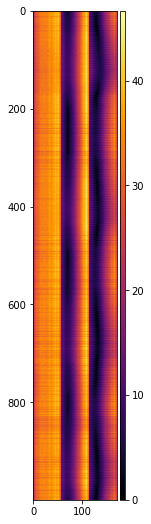

In [39]:
# Plotando essa janela como uma imagem
plota_ai_meu_chegado(janela1_amplitude)

> A visualização fica ruim né? Isso acontece porque nosso shape é (1000, 171), o que significa que temos 1000 linhas.

> Para resolver, basta a gente achar a transposta dessa matriz, ou sinal, ou array...

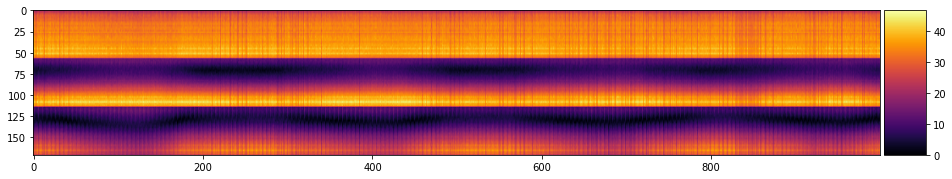

In [41]:
# Relembrando, todo array numpy tem a propriedade ".T", que já retorna o array transposto para nós!
plota_ai_meu_chegado(janela1_amplitude.T)

> Melhorou! 

Agora, vamos entender o porquê de visualizar uma imagem.

## Entendendo a imagem:

Como já falamos, os nossos dados são capturados de uma placa de Wi-Fi. Essa placa, por sua vez, possui três antenas.

Podemos considerar que a placa de Wi-Fi seja como uma câmera e, como você deve saber, o sensor de uma câmera é feito de pixels -> pequenos pontos sensíveis à luz, que registram a intensidade de cada cor.


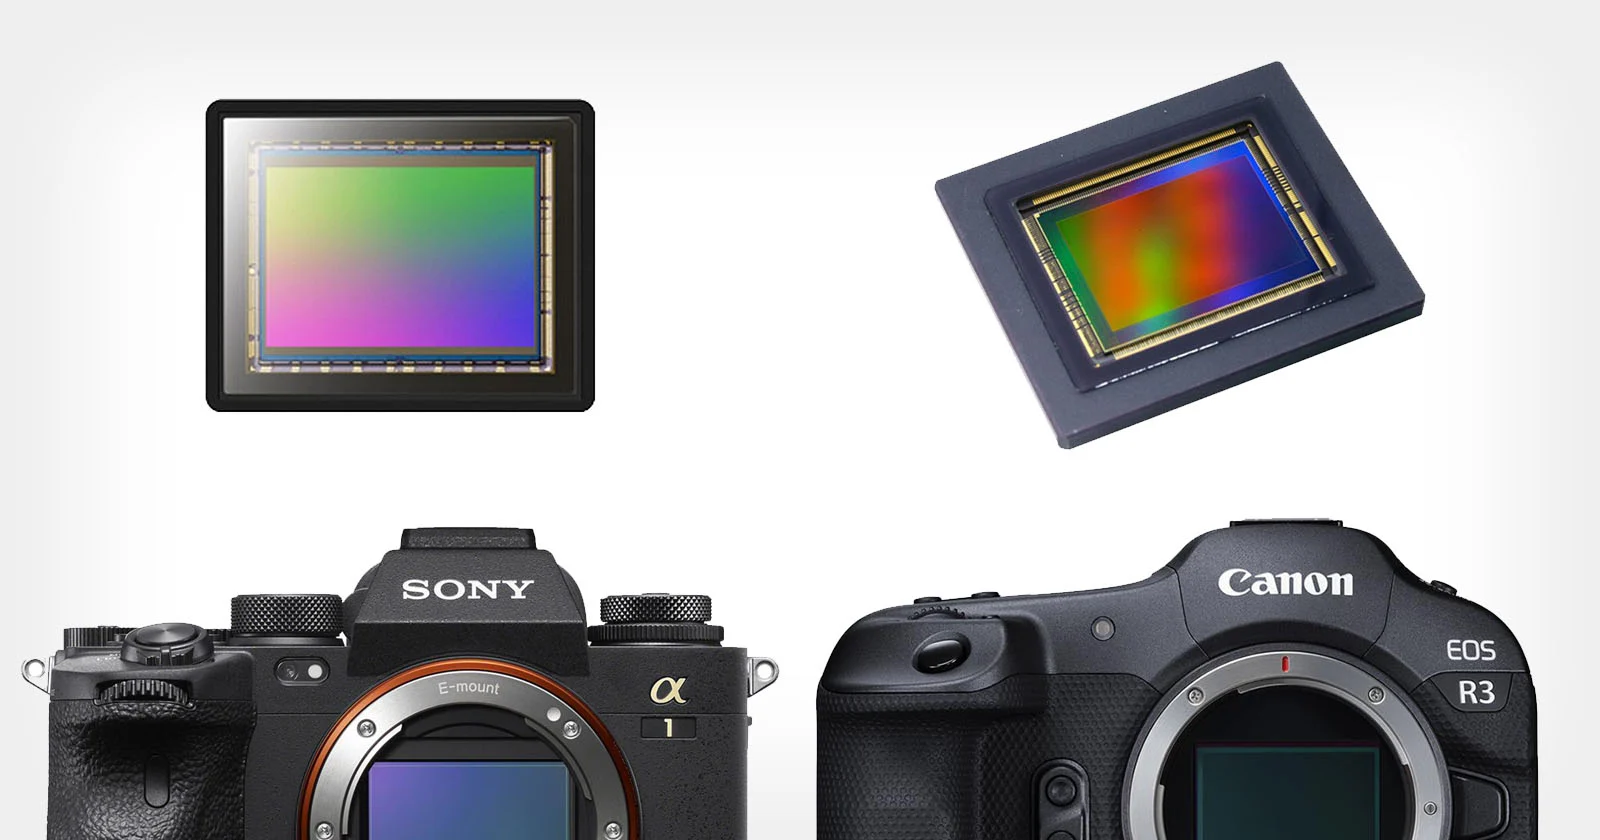

É comum que uma câmera atual tenha 48 megapixels, ou seja, 48 milhões de pixels para capturar a luz e formar uma imagem digital.

Vale ressaltar que cada pixel consegue enxergar 3 cores, ou seja, a profundidade de imagem.

Mas na nossa situação, a placa de wifi (nossa "câmera") tem apenas 3 antenas (os "pixels" dessa câmera) e o segredo está em entender cada subportadora como a profundidade dessa imagem, que no caso é de 57 "cores" (na câmera são apenas 3). 

Nossas capturas possuem 2 dimensões, Quantidade de pacotes e Quantidade de subportadoras. 

Por ser bidimensional, naturalmente surge a vontade de tratar isso como uma imagem. E podemos mesmos! Com algumas adaptações, claro.

In [27]:
# Temos 3 antenas, mas queremos ver o comportamento de 1 antena por vez, não as três juntas como foi plotado
# Então vamos plotar novamente tomando o cuidado de separar as antenas:

janela1.shape  # relembrando o shape

(1000, 171)

In [45]:
janela1_ant1 = abs(janela1[:, :57])  # obtendo todos os pacotes de amplitude que são da antena 1
janela1_ant2 = abs(janela1[:, 57: 57*2])
janela1_ant3 = abs(janela1[:, 57*2:57*3])

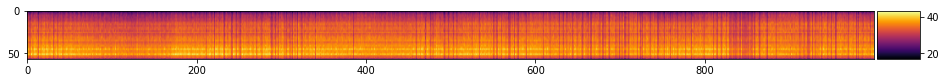

In [46]:
# plotando essas janelas de cada antena
plota_ai_meu_chegado(janela1_ant1.T)

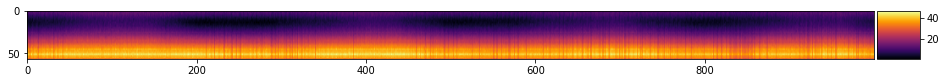

In [47]:
plota_ai_meu_chegado(janela1_ant2.T)

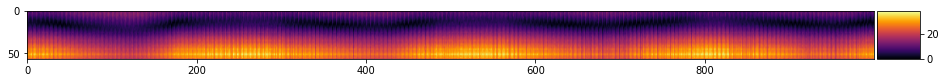

In [48]:
plota_ai_meu_chegado(janela1_ant3.T)

> Como podemos observar, a imagem é formada naturalmente.

## Plotando as outras capturas

> O Seaborn é melhor!

In [49]:
import seaborn as sns

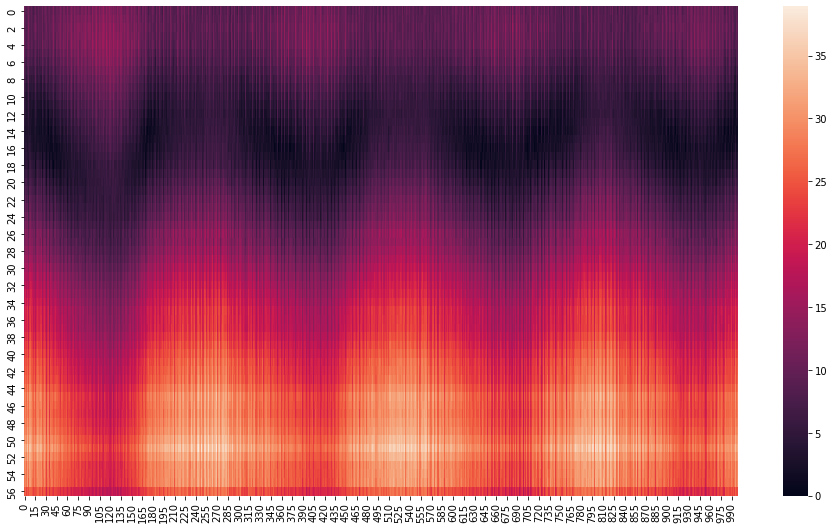

In [51]:
plt.figure(figsize=(16,9))
sns.heatmap(janela1_ant3.T)

In [52]:
# Criando uma função para plotar todas as capturas
def plote_tudo(capturas):
    for capt in capturas:
        capt = abs(capt)  # pegando amplitude
        
        plt.figure(figsize=(16,9))
        sns.heatmap(capt.T)

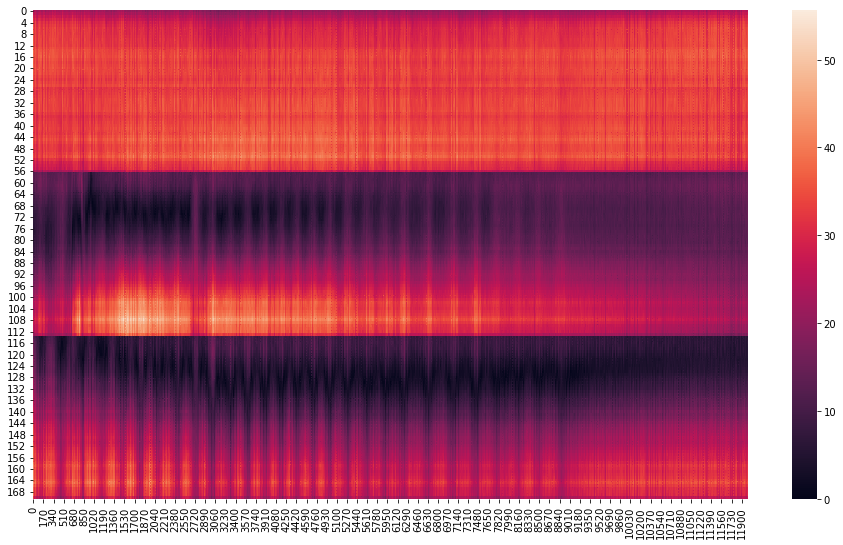

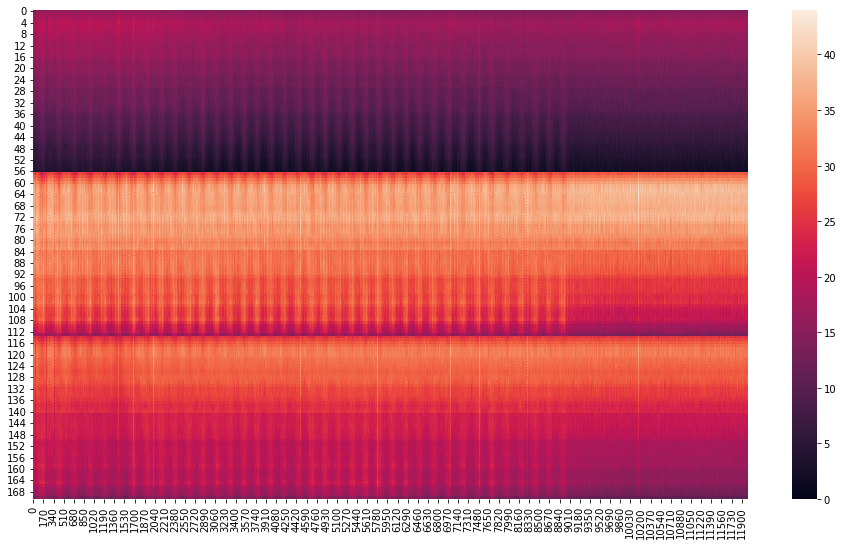

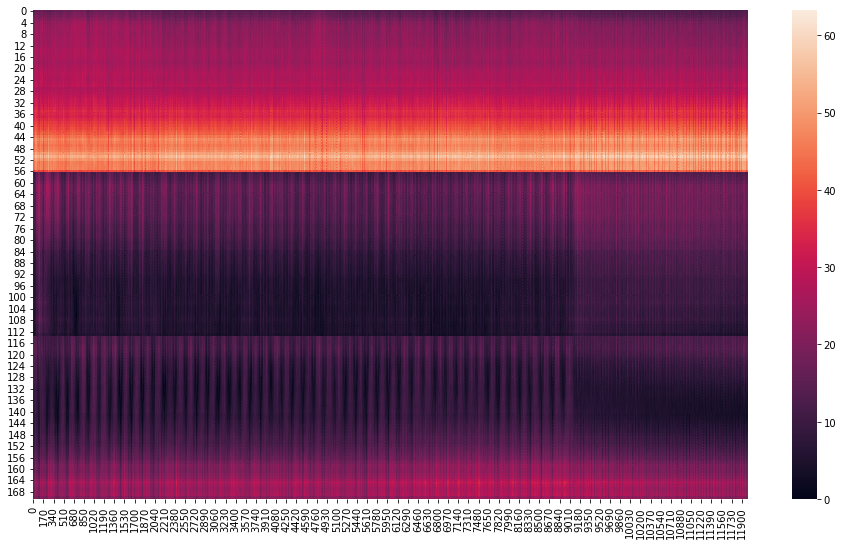

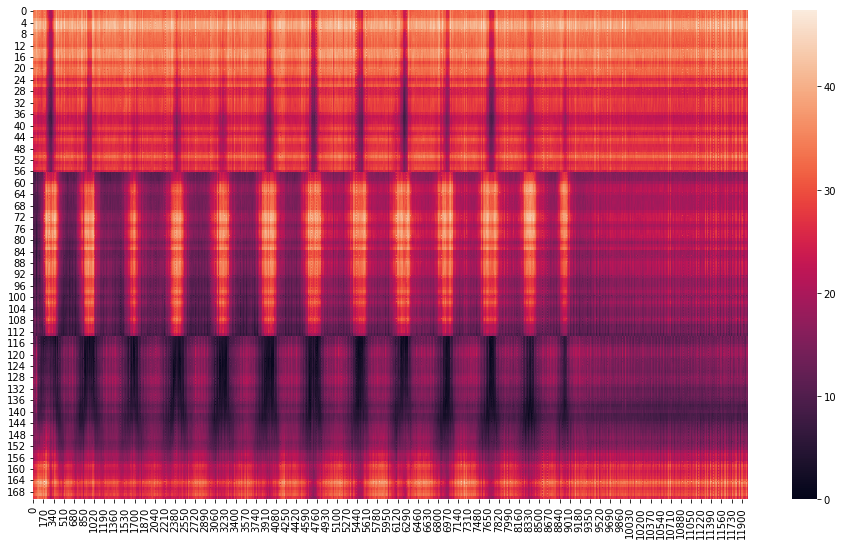

In [53]:
plote_tudo(dados_easy)